# CNN

# MINIST 손글씨 인식 : 기본프레임


Epoch 00001: val_loss improved from inf to 0.15294, saving model to ./model\01-0.1529.hdf5

Epoch 00002: val_loss improved from 0.15294 to 0.10525, saving model to ./model\02-0.1052.hdf5

Epoch 00003: val_loss improved from 0.10525 to 0.08174, saving model to ./model\03-0.0817.hdf5

Epoch 00004: val_loss improved from 0.08174 to 0.07618, saving model to ./model\04-0.0762.hdf5

Epoch 00005: val_loss improved from 0.07618 to 0.06730, saving model to ./model\05-0.0673.hdf5

Epoch 00006: val_loss improved from 0.06730 to 0.06694, saving model to ./model\06-0.0669.hdf5

Epoch 00007: val_loss improved from 0.06694 to 0.06069, saving model to ./model\07-0.0607.hdf5

Epoch 00008: val_loss did not improve from 0.06069

Epoch 00009: val_loss improved from 0.06069 to 0.05968, saving model to ./model\09-0.0597.hdf5

Epoch 00010: val_loss did not improve from 0.05968

Epoch 00011: val_loss did not improve from 0.05968

Epoch 00012: val_loss did not improve from 0.05968

Epoch 00013: val_loss did n

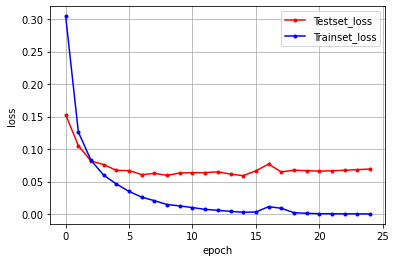

In [19]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

#seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

#모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

#모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

#모델의 실행
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

#테스트 정확도 출력
print("\n Test Accuracy : %.4f" %(model.evaluate(X_test, Y_test)[1]))

#테스트셋의 오차
y_vloss = history.history['val_loss']

#학습셋의 오차
y_loss = history.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# MNIST 손글씨 인식 : 컨볼루션 신경망 적용

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
#데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

#컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

#모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.05663, saving model to ./model\01-0.0566.hdf5

Epoch 00002: val_loss improved from 0.05663 to 0.04209, saving model to ./model\02-0.0421.hdf5

Epoch 00003: val_loss improved from 0.04209 to 0.03553, saving model to ./model\03-0.0355.hdf5

Epoch 00004: val_loss improved from 0.03553 to 0.03286, saving model to ./model\04-0.0329.hdf5

Epoch 00005: val_loss improved from 0.03286 to 0.02785, saving model to ./model\05-0.0278.hdf5

Epoch 00006: val_loss did not improve from 0.02785

Epoch 00007: val_loss improved from 0.02785 to 0.02698, saving model to ./model\07-0.0270.hdf5

Epoch 00008: val_loss did not improve from 0.02698

Epoch 00009: val_loss did not improve from 0.02698

Epoch 00010: val_loss did not improve from 0.02698

Epoch 00011: val_loss did not improve from 0.02698

Epoch 00012: val_loss did not improve from 0.02698

Epoch 00013: val_loss did not improve from 0.02698

Epoch 00014: val_loss did not improve from 0.02698

Epoch 00015

313/313 [==============================] - 2s 5ms/step - loss: 0.0304 - accuracy: 0.9923

 Test Accuracy : 0.9923


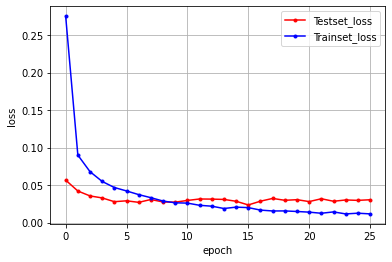

In [9]:
#테스트 정확도 출력
print("\n Test Accuracy : %.4f" %(model.evaluate(X_test, Y_test)[1]))

#테스트셋의 오차
y_vloss = history.history['val_loss']

#학습셋의 오차
y_loss = history.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()